In [ ]:
jupyter nbconvert *.ipynb --to slides --post serve 

In [1]:
conda install -c damianavila82 rise

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
jupyter-nbextension install rise --py --sys-prefix

SyntaxError: invalid syntax (<ipython-input-2-6bda427a57a2>, line 1)

In [ ]:
jupyter-nbextension enable rise --py --sys-prefix

# Impact of Regional Nutrition on Country's COVID-19 Recovery Rate
(OHHH NUTS!)

##Instructions
First: Go out and find a dataset of interest. It could be from one of our recommended resources, some other aggregation, or scraped yourself. Just make sure it has lots of variables in it, including an outcome of interest to you.

Second: Explore the data. Get to know the data. Spend a lot of time going over its quirks and peccadilloes. You should understand how it was gathered, what's in it, and what the variables look like.

Third: Model your outcome of interest. You should try several different approaches and really work to tune a variety of models before using the model evaluation techniques to choose what you consider to be the best performer. Make sure to think about explanatory versus predictive power and experiment with both.

Please execute the three tasks above in a Jupyter notebook that you will submit to the grading team below.

Next, in order to prepare for your presentation, create a slide deck and 15 minute presentation that guides viewers through your model. Be sure to cover a few specific things:

A specified research question your model addresses
How you chose your model specification and what alternatives you compared it to
The practical uses of your model for an audience of interest
Any weak points or shortcomings of your model
This presentation is not a drill. You'll be presenting this slide deck live to a group as the culmination of all your work so far on supervised learning. As a secondary matter, your slides and the Jupyter notebook should be worthy of inclusion as examples of your work product when applying to jobs.

Good luck!

he dataset has been successfully imported and the target variable has been explicitly mentioned.
Good job with data cleaning, checking univariate distribution and checking the outliers for exploratory data analysis (EDA).
Good job in checking the distribution of the independent variables with respect to the target variable.
The variables most suitable for the model have been correctly pointed out for the modelling stage.
At least, two models have been tried. Good job!
Good job in using hyperparameter tuning to get the best set of hyperparameters for the models.
All the models have been correctly compared using the correct metric.

In [3]:
import numpy as np
import pandas as pd
import scipy 
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sqlalchemy import create_engine
import warnings
from pandas_profiling import ProfileReport

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

# Upload Global Health Data Sets

## COVID Global Data Set
Source: https://www.kaggle.com/mariaren/covid19-healthy-diet-dataset/data
https://storage.googleapis.com/kagglesdsdata/datasets/618335/1175348/Fat_Supply_Quantity_Data.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1590357735&Signature=bWQ%2Fj3yRSui127xJMXfJ%2BtW6L0L5xx68ngVOg8U3ewhDulVfTGGUSSVyTSQmO5%2FPnt0%2FAXI7zhGfc6Keejv7bDqaK5mB6pZX4YzqHWPfiBo4s8Oa20eVOXlr2fMFdAZSiOLa6d2fpcia9QfebPZflAH4SgGEO5nuqbJLj%2FDOF0Mv1VHkRRp2BZ8dWsogc2jqxDIqISkOnFxasYodcbzL0lKKzPcfF7QJy%2ByzZj3osBjQ0OXCLwjiAT2DdFdwe%2FQ7Bkthv8fNAW8w9uXExH79t%2BL4QV%2F%2F10BKldwlht3mvzg18ZQYIvrmMtA%2BVLsNYBcvSIH5p%2FJCGN1v6fKnTNZXsw%3D%3D&response-content-disposition=attachment%3B+filename%3DFat_Supply_Quantity_Data.csv

## Health Focus Due to Pandemic Observations

### Regional Nutrition
~Observed COVID-19 impact on healthcare workers in my family follow a traditional Eastern Mediterranean diet that includes:
            Citrus fruits, Almonds, Nigella seeds on cheese or bread, Pistachios, and Pine nuts.
            Source: https://anjomanfood.com/nuts-in-the-middle-eastern-and-mediterranean-diet/

~Noticed Iran, Saudi Arabia, UAE (travel hub), Egypt, and Pakistan experienced cases with varying medical responses.
            Eastern Mediterranean region: Afghanistan, Bahrain, Egypt, Iran, Iraq, Jordan, Kuwait, Lebanon, Libya, Morocco, Pakistan, Palestine, Saudi Arabia, Syria, Tunisia, UAE, and Yemen.

~Tracked COVID-19 incidences across WHO maps.

~Excited to test my physican father's theory (and personal diet) out since we were all infected in January-February.

### Healthcare Access
~#1 Key variables to measure healthcare experiencing shortages--in both low and middle-income countries: Ventilator and critical care beds.

~#2 May 6: Iran reached 100,00 COVID-19 cases and still ranked in top 5 globally for over 1 month.
    Source: https://twitter.com/WHOEMRO/status/1258096811786592256/photo/1

In [4]:
#Pathname: Macintosh HD⁩ ▸ ⁨Users⁩ ▸ ⁨mehrunisaqayyum⁩ ▸ ⁨Downloads⁩ Fat_Supply_Quantity_Data.csv || 
import pandas as pd
diet_file = '/Users/mehrunisaqayyum/Downloads/Fat_Supply_Quantity_Data.csv'
df = pd.read_csv(diet_file)
df.head()

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0,21.6397,6.2224,0.0,8.0353,0.6859,0.0327,0.4246,6.1244,...,17.0831,0.3593,4.5,29.8,0.021411,0.000492,0.002445,0.018474,38042000.0,%
1,Albania,0.0,32.0002,3.4172,0.0,2.6734,1.6448,0.1445,0.6418,8.7428,...,9.2443,0.6503,22.3,6.2,0.033730,0.001085,0.026522,0.006123,2858000.0,%
2,Algeria,0.0,14.4175,0.8972,0.0,4.2035,1.2171,0.2008,0.5772,3.8961,...,27.3606,0.5145,26.6,3.9,0.017375,0.001309,0.009142,0.006925,43406000.0,%
3,Angola,0.0,15.3041,1.3130,0.0,6.5545,0.1539,1.4155,0.3488,11.0268,...,22.4638,0.1231,6.8,25,0.000165,0.000010,0.000054,0.000102,31427000.0,%
4,Antigua and Barbuda,0.0,27.7033,4.6686,0.0,3.2153,0.3872,1.5263,1.2177,14.3202,...,14.4436,0.2469,19.1,NaN,0.025773,0.003093,0.019588,0.003093,97000.0,%


In [ ]:
df

In [ ]:
df.columns

## World Health Organization Life Expectancy Data Set

In [5]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

life_df = pd.read_sql_query('select * from lifeexpectancy',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [ ]:
life_df

In [ ]:
#df.loc[df['shield'] > 6]
life_df.loc[life_df['Life expectancy '] > 70]

### Observation
We selected countries with a life expectancy over age '70'.

In [ ]:
life_df.index

In [ ]:
life_df.columns

## Exploratory Data Analysis
1) Join data sets df and life_df to be covid_df. Perform any data cleaning.
2) Explore data to discover relationships and features. We will explore the data using both statistics and data visualization. 
3) Perform feature engineering by reviewing the most important variables and transforming into features to predict, classify, or measure our target variable.

### Exploratory Note:
Both data sets include countries as columns, which will serve as the key. However, the 'life_df' set includes multiple years for each country, so we will select the most recent year for each country to join as the key when we append the data sets. 

In [ ]:
ProfileReport(df)

In [ ]:
ProfileReport(life_df)

In [6]:
life_df2 = life_df['Year'].max()
life_df2

2015

In [ ]:
life_df.nunique()

In [ ]:
df.nunique()

In [ ]:
#Unique values
df['Recovered'].value_counts()

In [ ]:
df.columns

In [ ]:
life_df.columns

In [7]:
#Drop less used from first data frame: Alcoholic Beverages, Sugar Crops, Sugar & Sweeteners ,Undernourished, Miscellaneous,Aquatic Products, Other,Undernourished,  
df2 = df.drop(['Alcoholic Beverages','Aquatic Products, Other','Sugar & Sweeteners','Sugar Crops','Miscellaneous','Undernourished','Aquatic Products, Other',], axis=1)
df2

,Country,Animal Products,Animal fats,Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Offals,...,Vegetal Products,Vegetable Oils,Vegetables,Obesity,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,21.6397,6.2224,8.0353,0.6859,0.0327,0.4246,6.1244,8.2803,0.3103,...,28.3684,17.0831,0.3593,4.5,0.021411,0.000492,0.002445,0.018474,38042000.0,%
1,Albania,32.0002,3.4172,2.6734,1.6448,0.1445,0.6418,8.7428,17.7576,0.2933,...,17.9998,9.2443,0.6503,22.3,0.033730,0.001085,0.026522,0.006123,2858000.0,%
2,Algeria,14.4175,0.8972,4.2035,1.2171,0.2008,0.5772,3.8961,8.0934,0.1067,...,35.5857,27.3606,0.5145,26.6,0.017375,0.001309,0.009142,0.006925,43406000.0,%
3,Angola,15.3041,1.3130,6.5545,0.1539,1.4155,0.3488,11.0268,1.2309,0.1539,...,34.7010,22.4638,0.1231,6.8,0.000165,0.000010,0.000054,0.000102,31427000.0,%
4,Antigua and Barbuda,27.7033,4.6686,3.2153,0.3872,1.5263,1.2177,14.3202,6.6607,0.1347,...,22.2995,14.4436,0.2469,19.1,0.025773,0.003093,0.019588,0.003093,97000.0,%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Venezuela (Bolivarian Republic of),16.3261,2.2673,2.5449,0.6555,0.5707,0.9640,7.0949,5.5217,0.2082,...,33.6855,29.5211,0.1851,25.2,0.002890,0.000035,0.000919,0.001936,28516000.0,%
166,Vietnam,33.2484,3.8238,3.7155,0.7839,1.1217,0.4079,26.4292,0.7520,0.3378,...,16.7548,5.6211,0.6373,2.1,0.000339,0.000000,0.000275,0.000064,95656000.0,%
167,Yemen,12.5401,2.0131,11.5271,0.5514,0.3847,0.2564,8.0010,1.3463,0.2436,...,37.4535,23.6312,0.1667,14.1,0.000631,0.000103,0.000017,0.000511,29162000.0,%
168,Zambia,9.6005,1.6113,14.3225,0.6266,1.0070,0.1343,4.9010,1.2756,0.1790,...,40.3939,15.2848,0.1567,6.5,0.004658,0.000039,0.001103,0.003516,17861000.0,%


In [8]:
#Drop less used from second data frame, Life data frame:
life_df2 = life_df.drop(['Measles ','Hepatitis B','infant deaths',' thinness  1-19 years','Alcohol', ' thinness 5-9 years','GDP','Total expenditure'], axis=1)
life_df2

,Country,Year,Status,Life expectancy,Adult Mortality,percentage expenditure,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,Population,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,71.279624,19.1,83,6.0,65.0,0.1,33736494.0,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,73.523582,18.6,86,58.0,62.0,0.1,327582.0,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,73.219243,18.1,89,62.0,64.0,0.1,31731688.0,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,78.184215,17.6,93,67.0,67.0,0.1,3696958.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,7.097109,17.2,97,68.0,68.0,0.1,2978599.0,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,0.000000,27.1,42,67.0,65.0,33.6,12777511.0,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,0.000000,26.7,41,7.0,68.0,36.7,12633897.0,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,0.000000,26.3,40,73.0,71.0,39.8,125525.0,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,0.000000,25.9,39,76.0,75.0,42.1,12366165.0,0.427,9.8


In [ ]:
life_df.tail(140)

### Join datasets by key 'Country' 
We will join both dataframes and select only Year == 2015 from the life_df2 dataframe to create a new dataframe: covid_df.


In [9]:
covid_df = pd.merge(df2, life_df2[life_df2['Year'] == 2015], left_on = 'Country', right_on = 'Country')

In [ ]:
covid_df

## Univariate Analysis

In [10]:
covid_df.corr()

,Animal Products,Animal fats,Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Offals,Oilcrops,...,Adult Mortality,percentage expenditure,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,Population_y,Income composition of resources,Schooling
Animal Products,1.000000,0.696317,-0.464931,0.470419,-0.021730,-0.112444,0.736699,0.634589,0.065823,-0.436742,...,-0.401995,0.113623,0.427160,-0.204313,0.385766,0.286291,-0.374073,-0.175792,0.689126,0.616102
Animal fats,0.696317,1.000000,-0.407189,0.281349,-0.118791,-0.168326,0.231632,0.342875,-0.179648,-0.340163,...,-0.353027,-0.008614,0.369455,-0.039779,0.279839,0.239359,-0.313355,-0.083317,0.594815,0.561922
Cereals - Excluding Beer,-0.464931,-0.407189,1.000000,-0.301811,-0.041983,0.016833,-0.278022,-0.276145,0.281311,0.113556,...,0.400019,-0.025796,-0.429014,0.174882,-0.423820,-0.275711,0.511248,0.063692,-0.629482,-0.569581
Eggs,0.470419,0.281349,-0.301811,1.000000,0.206953,-0.061869,0.242745,0.273953,-0.122609,-0.342333,...,-0.369550,0.076464,0.230078,-0.109621,0.259077,0.208234,-0.381427,0.056293,0.562982,0.457319
"Fish, Seafood",-0.021730,-0.118791,-0.041983,0.206953,1.000000,0.025822,0.015310,-0.272491,-0.091862,0.346553,...,-0.044788,-0.071822,-0.130329,-0.063458,-0.013412,-0.044516,-0.075533,0.033109,0.003294,-0.006498
Fruits - Excluding Wine,-0.112444,-0.168326,0.016833,-0.061869,0.025822,1.000000,-0.026609,-0.062986,0.075238,0.050115,...,0.027664,0.006149,-0.068760,-0.039160,0.034929,-0.028214,-0.047952,0.022113,-0.096971,-0.061888
Meat,0.736699,0.231632,-0.278022,0.242745,0.015310,-0.026609,1.000000,0.150011,0.229228,-0.241335,...,-0.146436,-0.019060,0.258219,-0.261477,0.223089,0.099342,-0.146077,-0.189613,0.384123,0.345947
Milk - Excluding Butter,0.634589,0.342875,-0.276145,0.273953,-0.272491,-0.062986,0.150011,1.000000,0.050456,-0.416321,...,-0.340831,0.307515,0.312060,-0.064060,0.307814,0.297828,-0.302312,-0.118948,0.439168,0.371274
Offals,0.065823,-0.179648,0.281311,-0.122609,-0.091862,0.075238,0.229228,0.050456,1.000000,-0.012253,...,0.306247,0.120770,-0.160281,-0.009059,-0.184620,-0.339397,0.283079,-0.036222,-0.261051,-0.244990
Oilcrops,-0.436742,-0.340163,0.113556,-0.342333,0.346553,0.050115,-0.241335,-0.416321,-0.012253,1.000000,...,0.132772,-0.010549,-0.212996,0.040473,-0.244861,-0.186438,0.110726,-0.017289,-0.377121,-0.349467


In [ ]:
ProfileReport(covid_df)

### Analysis Note:
Highly correlated =or Above +/- .5 correlation: Schooling w/'animal fat'

### Indicator of Health Index: 
To control for availability of ventilators or other country financed health interventions and infrastructure to deal with health emergencies, like pandemics.


~Index: Global Healthy Security Index https://www.ghsindex.org/wp-content/uploads/2019/10/2019-Global-Health-Security-Index.pdf
    Although 86% of countries invest local or donor funds in health security, few countries pay for health security gap assessments and action plans out of national budgets.
~Variable: Ventilators

~Variable: Critical Care Beds
Saudi Arabia -22.8 per 100,000 (high)
Pakistan - 1.5 (lower-middle)
Iran - 4.6 (upper-middle medium)
Oman - 14.6 (high)
Yemen
Source: https://www.researchgate.net/figure/Number-of-critical-care-beds-per-100-000-population_fig1_338520008
expenditure health - https://link.springer.com/article/10.1007/s00134-012-2627-8

In [11]:

# Define a dictionary containing Health Index 
health_score_data = {'Country': ['United States','United Kingdom', 'Netherlands', 'Australia','Canada','Thailand','Sweden',
                                 'Denmark','South Korea','Finland','France','Slovenia','Switzerland','Germany','Spain','Norway',
                                 'Latvia','Malaysia','Belgium','Portugal','Japan', 'Brazil','Ireland','Singapore','Argentina',
                                 'Austria','Chile','Mexico','Estonia','Indonesia','Italy','Poland','Lithuania','South Africa',
                                 'Hungary','New Zealand','Greece','Croatia','Albania','Turkey','Serbia','Czech Republic','Georgia',
                                 'Armenia','Ecuador','Mongolia','Kyrgyz Republic','Saudi Arabia','Peru','Vietnam','China','Slovakia',
                                 'Philippines','Israel','Kenya','United Arab Emirates','India','Iceland','Kuwait','Romania',
                                 'Bulgaria','Costa Rica','Russia','Uganda','Colombia','El Salvador','Luxembourg','Montenegro','Morocco',
                                 'Panama','Liechtenstein','Myanmar','Laos','Lebanon','Nicaragua','Oman','Cyprus','Moldova',
                                 'Bosnia and Herzegovina','Jordan','Uruguay','Qatar','Kazakhstan','Ethiopia','Bhutan','Madagascar',
                                 'Egypt','Bahrain','Cambodia','North Macedonia','Dominican Republic','Sierra Leone','Zimbabwe','Ukraine',
                                 'Senegal','Nigeria','Iran','Malta','Trinidad and Tobago','Suriname','Tanzania','Bolivia',
                                 'Paraguay','Namibia',"Côte d'Ivoire",'Ghana','Pakistan','Belarus','St. Lucia','Cuba','Liberia','Nepal',
                                 'Bangladesh','Mauritius','Cameroon','Uzbekistan','Azerbaijan','Gambia','Rwanda','Sri Lanka','Maldives',
                                 'Tunisia','St. Vincent and The Grenadines','Micronesia','Guatemala','Guinea','Monaco','Brunei','Togo',
                                 'Afghanistan','Tajikistan','Niger','Barbados','Seychelles','Belize','Turkmenistan', 'Guyana','Haiti',
                                 'Botswana','San Marino','Swaziland','Bahamas','Andorra','Lesotho','Burkina Faso','Cabo Verde',
                                 'Antigua and Barbuda','Jamaica','Mali','Benin','Chad','Zambia','Mozambique','Malawi',
                                 'Papua New Guinea','Honduras','Grenada','Mauritania','Central African Republic','Comoros','Congo','Samoa',
                                 'St. Kitts and Nevis','Sudan','Vanuatu','Timor-Leste','Iraq','Fiji','Libya','Angola','Tonga',
                                 'Dominica','Algeria','Brazzaville','Djibouti','Venezuela','Burundi','Eritrea','Palau','South Sudan','Tuvalu',
                                 'Nauru','Solomon Islands','Niue','Cook Islands','Gabon','Guinea-Bissau','Syria','Kiribati',
                                 'Yemen','Marshall Islands','São Tomé and Príncipe','North Korea','Somalia','Equatorial Guinea'],
                     
        'Health_index': [83.5,77.9,75.6,75.5,75.3,73.2,72.1,70.4,70.2,68.7,68.2,67.2,67.0,66.0,65.9,64.6,62.9,62.2,61.0,
                        60.3,59.8,59.7,59.0,58.7,58.6,58.5,58.3,57.6,57.0,56.6,56.2,55.4,55.0,54.8,54.0,54.0,53.8,53.3,52.9,52.4,
                        52.3,52.0,52.0,50.2,50.1,49.5,49.3,49.3,49.2,49.1,48.2,47.9,47.6,47.3,47.1,46.7,46.5,46.3,46.1,45.8,45.6,
                        45.1,44.3,44.3,44.2,44.2,43.8,43.7,43.7,43.7,43.5,43.4,43.1,43.1,43.1,43.1,43.0,42.9,42.8,42.1,
                        41.3,41.2,40.7,40.6,40.3,40.1,39.9,39.4,39.2,39.1,38.3,38.2,38.2,38.0,37.9,37.8,37.7,37.3,36.6,36.5,36.4,
                        35.8,35.7,35.6,35.5,35.5,35.5,35.3,35.3,35.2,35.1,35.1,35.0,34.9,34.4,34.3,34.2,34.2,34.2,33.9,33.8,33.7,
                        33.0,32.8,32.7,32.7,32.7,32.6,32.5,32.3,32.3,32.2,31.9,31.9,31.8,31.8,31.7,31.5,31.1,31.1,31.1,30.6,30.5,
                        30.2,30.1,29.3,29.0,29.0,29.0,28.8,28.8,28.7,28.1,28.0,27.8,27.6,27.5,27.5,27.3,27.2,26.5,26.4,26.2,26.2,
                        26.1,26.0,25.8,25.7,25.7,25.2,25.1,24.0,23.6,23.6,23.2,23.0,22.8,22.4,21.9,21.7,21.6,20.8,20.7,20.5,
                        20.4,20.0,20.0,19.9,19.2,18.5,18.2,17.7,17.5,16.6,16.2]} 
  
# Convert the dictionary to add into DataFrame 
health_df = pd.DataFrame(health_score_data) 
  
# Using DataFrame.insert() to add the column into covid_df
#covid_df.insert(df2["health_score_data"]) 

#Merge the 2 data sets
merged_df = pd.merge(covid_df, health_df, left_on='Country', right_on='Country')

In [ ]:
len(health_score_data['Country'])

In [ ]:
merged_df.columns

In [ ]:
merged_df.loc['United States']

## Missing Values
Need to fill in missing values for Percentage Expenditure, BMI, Polio, Treenuts, Pulses, Vegetables, 

In [12]:
life_df2['percentage expenditure'].fillna(life_df2['percentage expenditure'].mean(), inplace=True)

In [13]:
life_df2[' BMI '].fillna(life_df2[' BMI '].mean(), inplace=True)

In [14]:
life_df2['Polio'].fillna(life_df2['Polio'].mean(), inplace=True)

In [15]:
df2['Treenuts'].fillna(df2['Treenuts'].mean(),inplace=True)

In [16]:
df2['Pulses'].fillna(df2['Pulses'].mean(),inplace=True)

In [17]:
df2['Vegetables'].fillna(df2['Vegetables'].mean(),inplace=True)

In [18]:
df2['Meat'].fillna(df2['Meat'].mean(),inplace=True)

In [19]:
df2['Recovered'].value_counts() 

0.003040    1
0.071988    1
0.014166    1
0.000696    1
0.029198    1
           ..
0.001495    1
0.020174    1
0.007278    1
0.000017    1
0.000000    1
Name: Recovered, Length: 161, dtype: int64

In [ ]:
merged_df.corr()

In [20]:
merged_df.groupby(['Recovered','Vegetables','Treenuts']).mean

<bound method GroupBy.mean of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x122873e50>>

In [21]:
#Re-Run w/correct labels
    #Select those with tree nuts and Health Index . 
plt.figure(figsize=(10,10))
plt.hist(merged_df[(merged_df["partner"] == 1.0) & (merged_df["year"] == 6)]["pplfair"].dropna(), label="Lives With Partner", alpha=.5)
plt.hist(merged_df[(merged_df["partner"] == 2.0) & (merged_df["year"] == 6)]["pplfair"].dropna(), label="Does not", alpha=.5)
plt.legend()
plt.title("", size=15)

KeyError: 'partner'

<Figure size 720x720 with 0 Axes>

## Decision Tree (Regression)

### Target Variable: Recovery rate = 'Recovered' as continuous value

### Independents: Series of Nutritional Diets

In [22]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score 

#X = merged_df[['percentage expenditure',' BMI ','Polio','Treenuts','Pulses','Meat','Vegetables','Health_index']]
#X = merged_df['Treenuts','Health_index'] #Dropping a bunch to check
merged_df_dropped = merged_df.dropna()
# X = merged_df_dropped[['Treenuts', 'Health_index']]
X = merged_df_dropped.drop(columns=['Recovered', 'Country', 'Unit (all except Population)', 'Status', 'Confirmed', 'Population_x', 'Population_y'])
y = merged_df_dropped['Recovered']

#Split data to train and test with 20% sample 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2,random_state =5)

#regressor = DecisionTreeRegressor()
dtr_model = DecisionTreeRegressor(random_state=0)
dtr_model.fit(X_train, y_train)  

DecisionTreeRegressor(random_state=0)

In [23]:
(merged_df_dropped['Recovered'] > 0.5)

0      False
1      False
2      False
3      False
5      False
       ...  
137    False
139    False
140    False
143    False
144    False
Name: Recovered, Length: 123, dtype: bool

### Note:
We will identify the most important features in the training set in our Decision Tree Regression model. 

In [24]:
merged_df_dropped.index

Int64Index([  0,   1,   2,   3,   5,   6,   7,   8,   9,  11,
            ...
            131, 132, 133, 134, 136, 137, 139, 140, 143, 144],
           dtype='int64', length=123)

In [25]:
print(dtr_model.score(X_train, y_train))

1.0


In [26]:
print(dtr_model.score(X_test, y_test))

0.24603433683181652


In [ ]:
pd.Series(dtr_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

### Observation:
We see that our dependent variable of interest "Tree Nuts" did not rank in the top 10. This means it does not have as much significance as we hypothesized.

Run Second Model: Linear Regression Model We will use the same target variable 'Recovered' and the above dependent variables.

## Linear Regression Model

### Note:
We will check the score of our Linear Regression model on our test training set. 

In [27]:
#Linear Regression Model
from sklearn.linear_model import LinearRegression

line = LinearRegression()

line.fit(X_train, y_train)

LinearRegression()

In [28]:
line.score(X_train, y_train)

0.5045183791666261

### Observation:
We see that the score is much lower on our test set. This means that our second model overfit the data to the training set.

In [29]:
line.score(X_test, y_test)

0.14942329478116556

### Note:
Thressholds: Organizing Numerical Values in Diet into Categorical for Comparison

We will set a thresshold of 'Recovery' to 10 percent to see countries that fall into that classifying group.

In [30]:
merged_df[merged_df['Recovered'] <= 0.1]

,Country,Animal Products,Animal fats,Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Offals,...,percentage expenditure,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,Population_y,Income composition of resources,Schooling,Health_index
0,Afghanistan,21.6397,6.2224,8.0353,0.6859,0.0327,0.4246,6.1244,8.2803,0.3103,...,71.279624,19.1,83,6.0,65.0,0.1,33736494.0,0.479,10.1,32.3
1,Albania,32.0002,3.4172,2.6734,1.6448,0.1445,0.6418,8.7428,17.7576,0.2933,...,364.975229,58.0,0,99.0,99.0,0.1,28873.0,0.762,14.2,52.9
2,Algeria,14.4175,0.8972,4.2035,1.2171,0.2008,0.5772,3.8961,8.0934,0.1067,...,0.000000,59.5,24,95.0,95.0,0.1,39871528.0,0.743,14.4,23.6
3,Angola,15.3041,1.3130,6.5545,0.1539,1.4155,0.3488,11.0268,1.2309,0.1539,...,0.000000,23.3,98,7.0,64.0,1.9,2785935.0,0.531,11.4,25.2
4,Antigua and Barbuda,27.7033,4.6686,3.2153,0.3872,1.5263,1.2177,14.3202,6.6607,0.1347,...,0.000000,47.7,0,86.0,99.0,0.2,NaN,0.784,13.9,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Uruguay,25.5069,3.4811,2.5698,1.2804,0.3281,0.1777,12.2841,8.0603,0.0729,...,0.000000,64.0,0,95.0,95.0,0.1,3431552.0,0.794,15.5,41.3
140,Uzbekistan,25.9903,2.4884,2.7168,1.0639,0.0962,0.5830,10.3624,11.8050,0.1743,...,0.000000,44.7,17,99.0,99.0,0.1,312989.0,0.697,12.1,34.3
142,Yemen,12.5401,2.0131,11.5271,0.5514,0.3847,0.2564,8.0010,1.3463,0.2436,...,0.000000,41.3,47,63.0,69.0,0.1,NaN,0.499,9.0,18.5
143,Zambia,9.6005,1.6113,14.3225,0.6266,1.0070,0.1343,4.9010,1.2756,0.1790,...,0.000000,23.4,40,9.0,9.0,4.1,161587.0,0.576,12.5,28.7


We will set a thresshold of 'Treenut' to .15 to see countries that fall into that classifying group of consuming tree nuts and level of incorporating.

In [31]:
#Create a subclass to compare/contrast countries consuming "Treenuts"
#Treenuts_categorical will be those countries consuming below our thresshold of 1.5 percent .015
merged_df['treenuts_categorical'] = merged_df['Treenuts'] <= 0.015
merged_df['treenuts_categorical']

0      False
1      False
2      False
3      False
4      False
       ...  
140    False
141    False
142    False
143     True
144    False
Name: treenuts_categorical, Length: 145, dtype: bool

In [ ]:
#Example data['Country'].value_counts().head(30).plot(kind='barh')
https://www.drawingfromdata.com/setting-figure-size-using-seaborn-and-matplotlib
http://seaborn.pydata.org/tutorial/categorical.html
    

## Visualizing 'Recovery Rate Across Eastern Mediterranean Countries'
Hardest Hit Countries Comparison

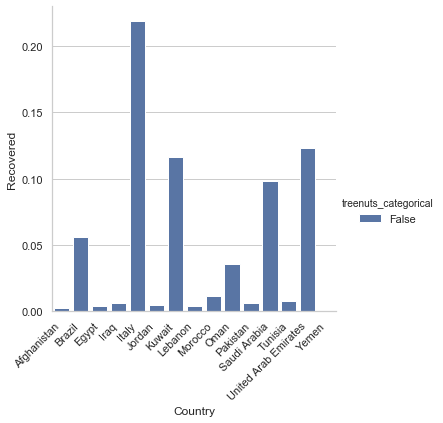

In [32]:
# Goal: To plot countries' recovery rates w/r/t nutritional categories--subclass plotting | Plot counts for each country's recovery rate.
#Doesn't portray sufficiently, USE: sns.countplot(y="Recovered", hue="Country", data=merged_df, palette="Greens_d")
            #plt.show()  for  hue ='treenuts_categorial'
            #sns.catplot(x="Country", y="Recovered", hue='treenuts_categorical', kind="bar", 
            #data=merged_df[merged_df['Country'].isin(['Italy','Spain', 'Brazil'])]);
#Inserting top ranked countries w/highest number of COVID-19 cases (Italy, US, and Brazil(more recently))
chart = sns.catplot(x="Country", y="Recovered", hue='treenuts_categorical', kind="bar", data=merged_df[merged_df['Country'].isin(['Italy','United States'
                        , 'Brazil','Iran','Lebanon', 'Afghanistan','Kuwait', 'Pakistan', 'Saudi Arabia','Jordan',
                        'Syria','Yemen','Egypt','United Arab Emirates','Oman','Bahrain','Qatar','Morocco','Libya','Tunisia','Iraq'])]);
chart.set_xticklabels(rotation=45, horizontalalignment='right')
#chart.set_xticklabels(chart.get_xticklabels(x), rotation=45, horizontalalignment='right')

### Sorting Eastern Mediterranean Countries
We are curious about a region with a high 'Treenuts' content in their daily diet. So we selected the Eastern Mediterranean region from the World Health Organization grouping.

In [33]:
merged_df.loc[[0,40,64,70,74,76,92,103,104,114,133,138,142],'Treenuts']

0      0.7513
40     0.2992
64     0.6341
70     0.9018
74     1.1810
76     2.9110
92     1.9048
103    0.6107
104    0.1909
114    0.7128
133    2.3289
138    3.8246
142    0.0769
Name: Treenuts, dtype: float64

In [34]:
#merged_df.iloc[[0,40,70,71,77,83,87,103,116,117,133],'Treenuts'].mean()
merged_df[merged_df['Country'].isin(['Lebanon', 'Afghanistan','Kuwait', 'Pakistan', 'Saudi Arabia','Jordan','Syria','Yemen','Egypt','United Arab Emirates','Oman','Bahrain','Qatar','Morocco','Libya','Tunisia','Somalia','Iran','Iraq'])]

,Country,Animal Products,Animal fats,Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Offals,...,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,Population_y,Income composition of resources,Schooling,Health_index,treenuts_categorical
0,Afghanistan,21.6397,6.2224,8.0353,0.6859,0.0327,0.4246,6.1244,8.2803,0.3103,...,19.1,83,6.0,65.0,0.1,33736494.0,0.479,10.1,32.3,False
40,Egypt,15.9979,3.4231,13.4988,0.8448,1.3200,0.7216,6.4678,3.6343,0.2992,...,61.1,60,93.0,93.0,0.1,NaN,0.688,13.1,39.9,False
64,Iraq,11.1327,3.8118,6.2761,1.9023,0.1441,0.2306,3.5164,1.7366,0.0288,...,59.1,38,63.0,58.0,0.1,36115649.0,0.649,10.1,25.8,False
70,Jordan,12.2622,1.8696,3.7391,0.5224,0.3189,0.1980,5.8122,3.6512,0.0880,...,65.6,4,99.0,99.0,0.1,915932.0,0.741,13.1,42.1,False
74,Kuwait,19.8923,2.1588,3.0847,2.3242,0.3732,0.3496,9.5706,5.2766,0.1890,...,71.4,1,99.0,99.0,0.1,NaN,0.799,13.3,46.1,False
76,Lebanon,12.4024,2.1637,2.2530,0.3290,0.3681,0.5800,5.1361,4.3553,0.0502,...,66.1,1,75.0,81.0,0.1,5851479.0,0.763,13.3,43.1,False
92,Morocco,15.4227,3.5807,7.1539,1.1517,1.2329,0.7014,6.9989,2.2296,0.2289,...,58.5,20,99.0,99.0,0.1,3483322.0,0.645,12.1,43.7,False
103,Oman,23.6146,2.3712,3.7744,1.4422,0.9290,0.7926,9.0171,9.6407,0.2144,...,54.6,1,99.0,99.0,0.1,NaN,0.795,13.7,43.1,False
104,Pakistan,24.8245,8.9701,4.2124,0.6203,0.0818,0.1227,3.4967,11.5125,0.1431,...,25.4,433,72.0,72.0,0.1,18938513.0,0.548,8.1,35.5,False
114,Saudi Arabia,15.3954,2.6475,5.2126,0.9019,0.4122,0.4219,6.9243,4.4125,0.0970,...,68.2,8,97.0,98.0,0.1,NaN,0.845,16.1,49.3,False


# Results:
We see that the Eastern Mediterranean countries included (Afghanistan, Egypt, Iraq, Jordan, Kuwait, Lebanon, Morocco, Oman, Pakistan, Saudi Arabia, Tunisia, United Arab Emirates, and Yemen) present a range between .076 (Yemen) to 3.82 (UAE) regarding 'Treenuts' composite in diet. This range may be attributed to income per capita. Specifically, the lowest end of spectrum is Yemen, a lower-income country, in contrast to the highest end of spectrum UAE, a high-income country. We would need to do a comparative analysis to see if the same trend occurs with this diet in another region and see if income disproportionally affects the consumption of tree nuts.

# Gaps for Further Study:
Upon reflection, we could have controlled for income and its access to nutrition. More specifically, nutrition includes higher-priced food items that are more expensive to transport from mountainous to desert regions. If we were to run a regression model on nutritional items and price, consuming 'Tree nuts' (almonds, pine nuts, hazlenuts, pistachios and walnuts) would present a premium. 

To better test the regional nutritional theory positively influencing the COVID-19 recovery rate, we should have sampled the top 10 percent of the population in each Eastern Mediterranean country. Then we would have been better compare the access to high-priced food items, like 'Tree nuts' category, which are more readily available and prepared in higher-priced dishes, like desserts and meat-based rice. These are dishes that populations below the poverty line cannot afford, and thereby cannot easily incorporate into their daily diets to build immunity and ultimately lead to likely recovery--if infected by COVID-19.  